In [4]:
import wotan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wotan import flatten
from wotan import t14
import lightkurve as lk
import os 
from transitleastsquares import transitleastsquares, cleaned_array, transit_mask
plt.rcParams['figure.dpi'] = 200

In [5]:
full_raw = lk.search_lightcurve('TIC 441420236').download_all()

In [ ]:
test_raw = full_raw[2,8]
test_stiched = test_raw.stitch()

In [7]:
raw_lc = full_raw[2]

In [ ]:
raw_times = raw_lc.time.value
raw_fluxes = raw_lc.flux.value
flatten_lc, trend_lc = flatten(raw_times,raw_fluxes,method='cosine',window_length=.15,break_tolerance=0.5,return_trend=True)

# PROCESSING ... may need to sigma clip at first as well 

lc_mean = np.nanmean(flatten_lc)
lc_std = np.nanstd(flatten_lc)

upper_lim = lc_mean+2*lc_std
mask = np.where(flatten_lc<upper_lim)

sigma_clipped_times = raw_times[mask]
sigma_clipped_fluxes = flatten_lc[mask]

more_than_80 = np.where(sigma_clipped_fluxes>0.8)

times = sigma_clipped_times[more_than_80]
fluxes = sigma_clipped_fluxes[more_than_80]

half = np.where(times<1700)

Converged.
Converged.


In [ ]:
fig, ax = plt.subplots(figsize=(9,2))

# raw light curve

left_xlim = (1320,1360)

raw_half = np.where(raw_times<1700)
raw_times_half = raw_times[raw_half]
ax.scatter(raw_times[raw_half], raw_fluxes[raw_half], s=1, c='black')
ax.plot(raw_times[raw_half], trend_lc[raw_half], lw=1, c='red',alpha=0.6)

ax.axvline(x=1350)
ax.axvline(x=1347,label='1347-1350')

ax.legend()
ax.set(xlim=left_xlim)
plt.show()

plt.clf()
plt.close()

In [ ]:
raw_times = raw_lc.time.value
raw_fluxes = raw_lc.flux.value
flatten_lc, trend_lc = flatten(raw_times,raw_fluxes,method='cosine',window_length=.5,break_tolerance=0.5,return_trend=True)
#raw_half = np.where(raw_times<1700)

times = raw_times#[raw_half]
fluxes = raw_fluxes#[raw_half]
trend = trend_lc#[raw_half]

mask = np.logical_or(times>1350, times<1347)
#mask = np.intersect1d(np.logical_or(times<1355, times>1355.5), mask)

#print(mask)

times = times[mask]
fluxes = fluxes[mask]
trend = trend_lc[mask]


mask = np.logical_or(times>1335.5, times<1334.9)

times = times[mask]
fluxes = fluxes[mask]
trend = trend[mask]

Converged.
Converged.


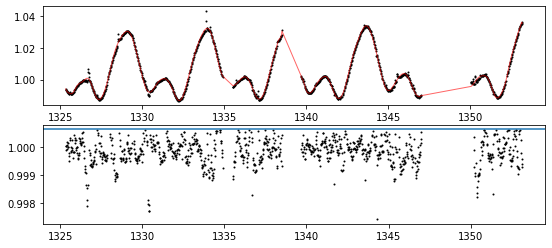

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(9,4))

ax = axs[0]

ax.scatter(times, fluxes, s=1, c='black')
ax.plot(times, trend, lw=1, c='red',alpha=0.6)
#ax.axvline(x=1335.5)


ax = axs[1]
detrended = fluxes/trend

mean = np.nanmean(detrended)
std = np.nanstd(detrended)

upper_lim = mean+0.75*std
mask = np.where(detrended<upper_lim)

ax.axhline(y=upper_lim)

times = times[mask]
detrended = detrended[mask]

ax.scatter(times, detrended, s=1, c='black')

### redux redux

In [29]:
test_raw = full_raw[2,8]
raw_lc = test_raw.stitch()

In [ ]:
raw_times = raw_lc.time.value
raw_fluxes = raw_lc.flux.value

mask = np.where(raw_fluxes>0.8)
times = raw_times[mask]
fluxes = raw_fluxes[mask]

mask = np.logical_or(times>1335.5, times<1334.9)

times = times[mask]
fluxes = fluxes[mask]

flatten_lc, trend_lc = flatten(times,fluxes,method='cosine',window_length=.5,break_tolerance=0.5,return_trend=True)

mask = np.logical_or(times>1350, times<1348)

times = times[mask]
fluxes = fluxes[mask]
trend = trend_lc[mask]
detrended = flatten_lc[mask]

left = np.where(times<1700)
right = np.where(times>1700)

Converged.
Converged.
Converged.
Converged.
Converged.


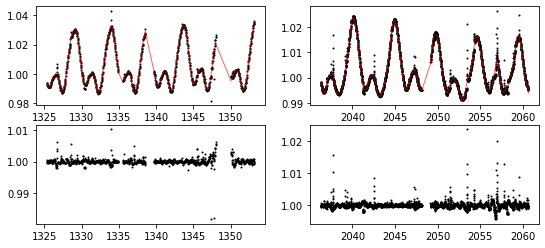

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(9,4))

ax = axs[0,0]

left = np.where(times<1700)
right = np.where(times>1700)

ax.scatter(times[left], fluxes[left], s=1, c='black')
ax.plot(times[left], trend[left], lw=1, c='red',alpha=0.6)

ax = axs[0,1]
ax.scatter(times[right], fluxes[right], s=1, c='black')
ax.plot(times[right], trend[right], lw=1, c='red',alpha=0.6)

ax = axs[1,0]
ax.scatter(times[left], detrended[left], s=1, c='black')

ax = axs[1,1]
ax.scatter(times[right], detrended[right], s=1, c='black')

## better? 

In [30]:
print(raw_lc.keys())
print(list(set(raw_lc.quality)))

['time', 'flux', 'flux_err', 'cadenceno', 'sap_flux', 'kspsap_flux', 'kspsap_flux_err', 'quality', 'orbitid', 'sap_x', 'sap_y', 'sap_bkg', 'sap_bkg_err', 'kspsap_flux_sml', 'kspsap_flux_lag']
[4096, 0, 6144, 2048]


In [31]:
for i in list(set(raw_lc.quality)): 
    print(lk.TessQualityFlags.decode(i))
    print(len(np.where(raw_lc.quality==i)[0]))

print(len(raw_lc.quality))

good_quality = np.where(raw_lc.quality==0)
times = raw_lc.time[good_quality].value
fluxes = raw_lc.flux[good_quality].value

['Straylight2']
371
[]
3794
['Straylight', 'Straylight2']
12
['Straylight']
441
4618


WE WEREN'T ADJUSTING FOR QUALITY!!! OR MULTIPLE SESSIONS!!! 😠

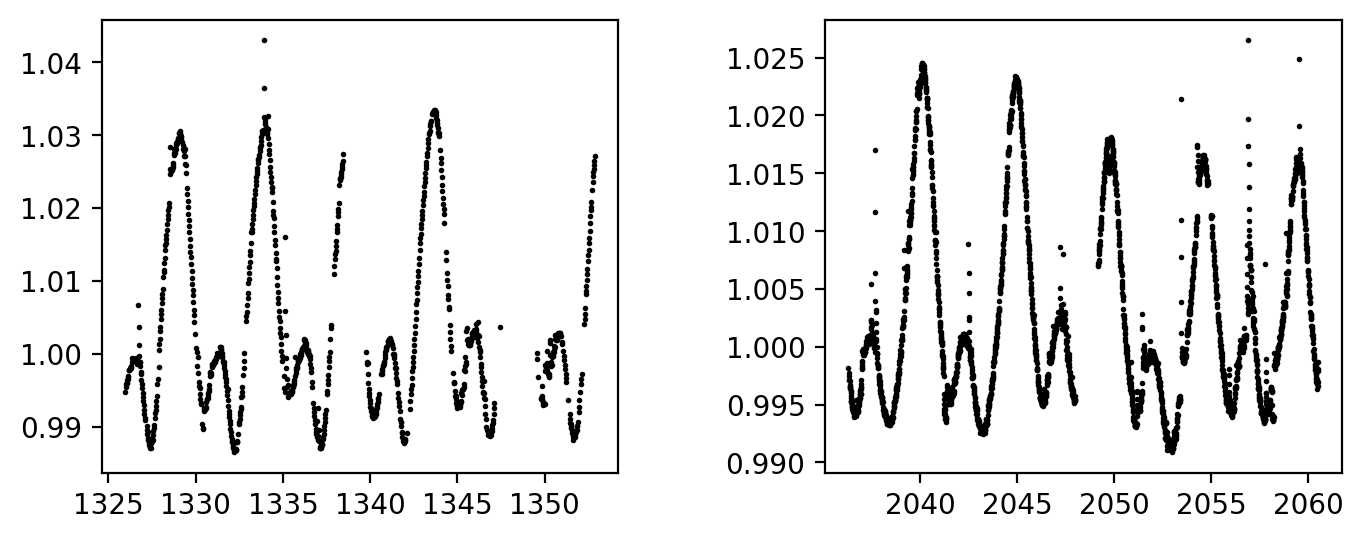

In [32]:
fig, axs = plt.subplots(1,2,figsize=(8,3))

left = np.where(times<1700)
right = np.where(times>1700)

axs[0].scatter(times[left],fluxes[left],s=1,c='black')
axs[1].scatter(times[right],fluxes[right],s=1,c='black')

plt.subplots_adjust(wspace=0.4)

In [33]:
flatten_lc, trend_lc = flatten(times,fluxes,method='cosine',window_length=.5,break_tolerance=0.5,return_trend=True)

Converged.
Converged.
Converged.
Converged.
Converged.


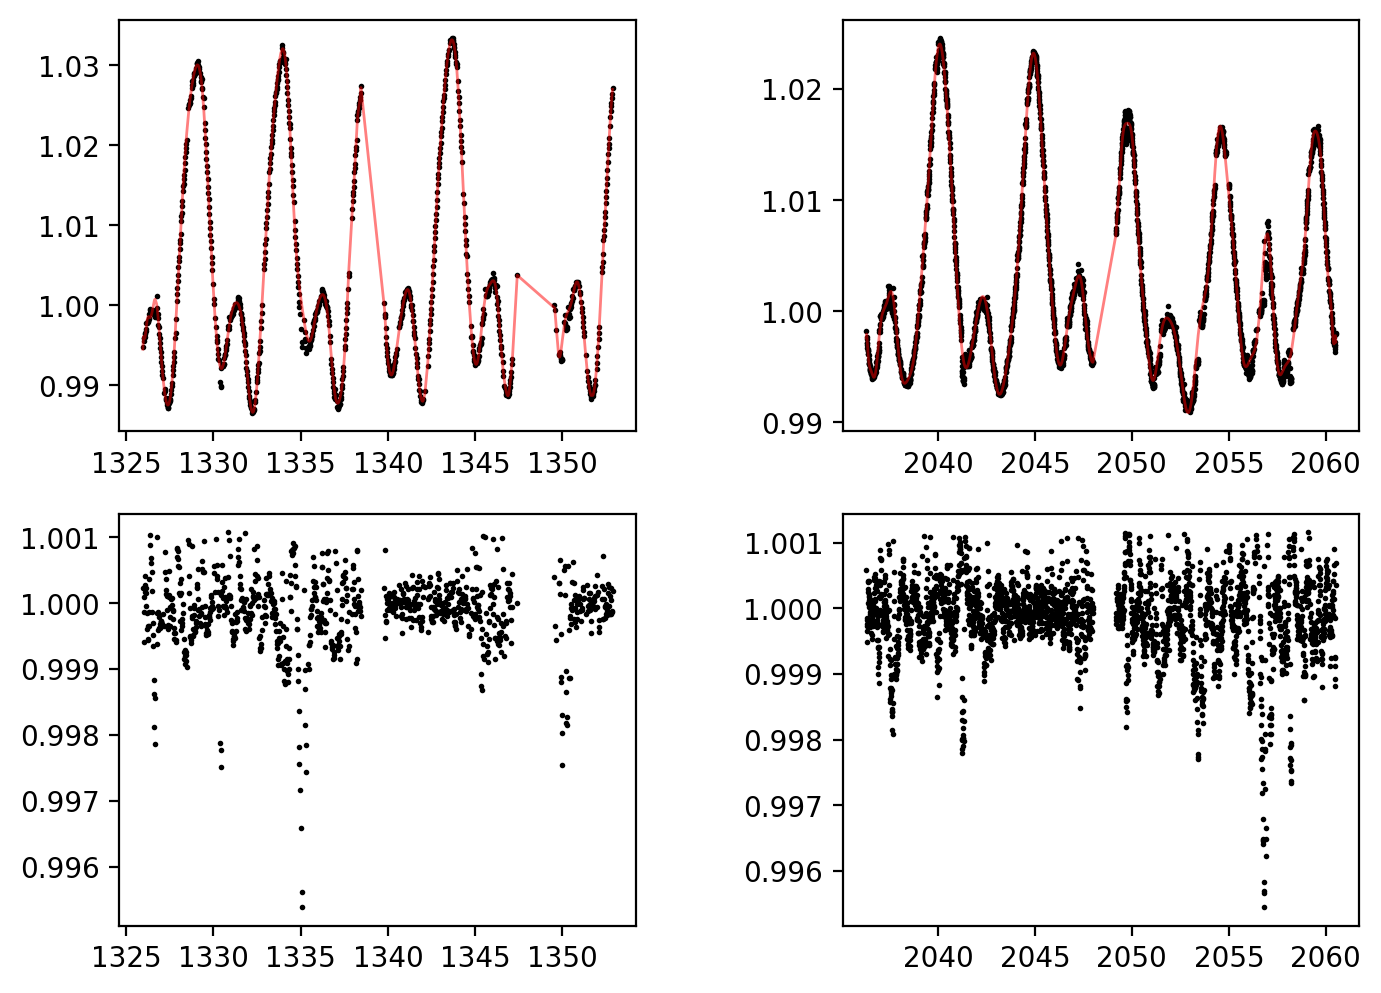

In [34]:
fig, axs = plt.subplots(2,2,figsize=(8,6))

cutoff = np.nanmean(flatten_lc)+np.nanstd(flatten_lc)
mask = np.where(flatten_lc<cutoff)

times = times[mask]
fluxes = fluxes[mask]
flatten_lc = flatten_lc[mask]
trend_lc = trend_lc[mask]

left = np.where(times<1700)
right = np.where(times>1700)

axs[0,0].scatter(times[left],fluxes[left],s=1,c='black')
axs[0,0].plot(times[left],trend_lc[left],lw=1,c='red',alpha=0.5)

axs[1,0].scatter(times[left],flatten_lc[left],s=1,c='black')

axs[0,1].scatter(times[right],fluxes[right],s=1,c='black')
axs[0,1].plot(times[right],trend_lc[right],lw=1,c='red',alpha=0.5)

axs[1,1].scatter(times[right],flatten_lc[right],s=1,c='black')

plt.subplots_adjust(wspace=0.4)

In [35]:
model = transitleastsquares(times, flatten_lc, verbose=False)
results = model.power(use_threads=4, period_min=7, period_max=10, verbose=False, show_progress_bar=False, n_transits_min=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/transitleastsquares/main.py:411: UserWarning: 74 of 77 transits without data. The true period may be twice the given period.
  warnings.warn(text)


9.494708457097834
dict_keys(['SDE', 'SDE_raw', 'chi2_min', 'chi2red_min', 'period', 'period_uncertainty', 'T0', 'duration', 'depth', 'depth_mean', 'depth_mean_even', 'depth_mean_odd', 'transit_depths', 'transit_depths_uncertainties', 'rp_rs', 'snr', 'snr_per_transit', 'snr_pink_per_transit', 'odd_even_mismatch', 'transit_times', 'per_transit_count', 'transit_count', 'distinct_transit_count', 'empty_transit_count', 'FAP', 'in_transit_count', 'after_transit_count', 'before_transit_count', 'periods', 'power', 'power_raw', 'SR', 'chi2', 'chi2red', 'model_lightcurve_time', 'model_lightcurve_model', 'model_folded_phase', 'folded_y', 'folded_dy', 'folded_phase', 'model_folded_model'])
1335.1586161450302


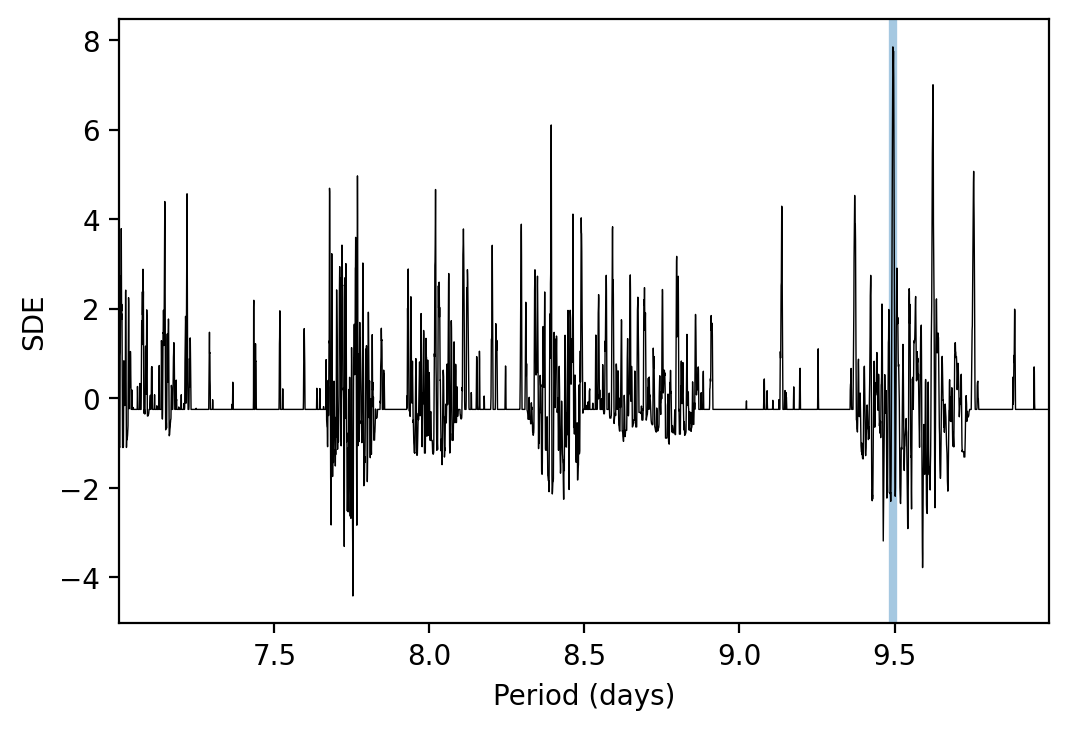

In [41]:
plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(np.min(results.periods), np.max(results.periods))

'''
for n in range(2, 10):
    ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
'''
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(min(results.periods), max(results.periods))

print(results.period)
print(results.keys())

print(results.T0)

Text(0, 0.5, 'Relative flux')

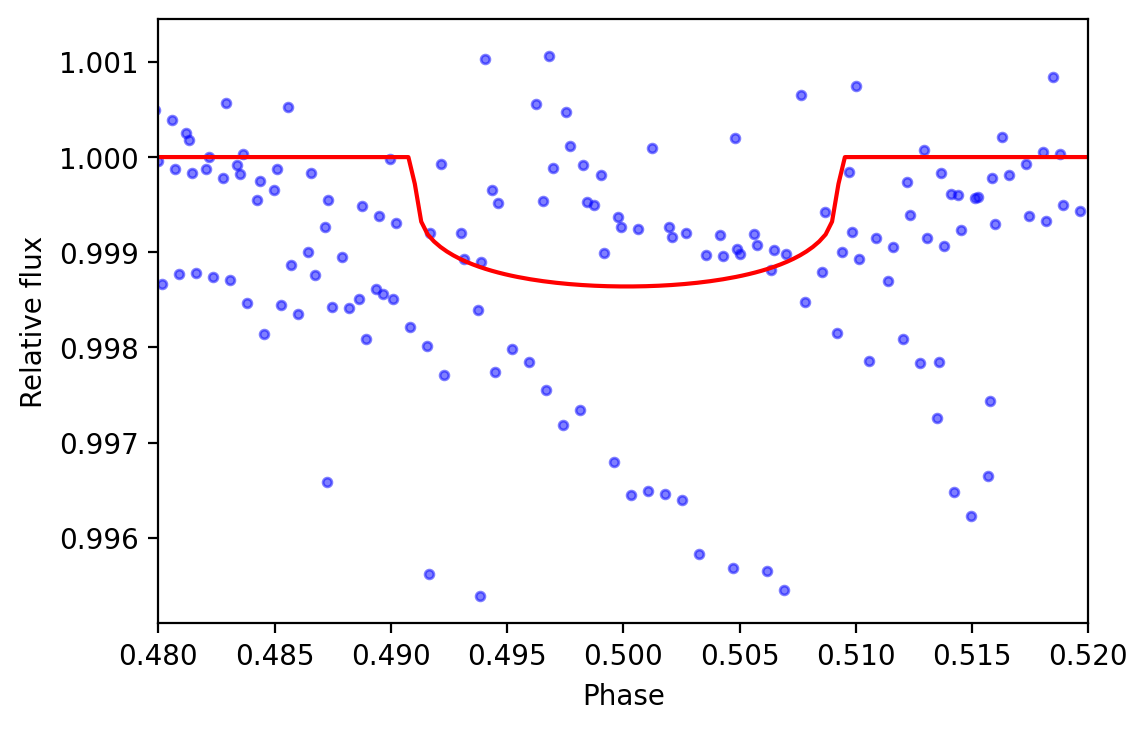

In [37]:
plt.figure()
plt.plot(
    results.model_folded_phase,
    results.model_folded_model,
    color='red')
plt.scatter(
    results.folded_phase,
    results.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.48, 0.52)
plt.xlabel('Phase')
plt.ylabel('Relative flux')